### Project Proposal-

Diabetes is a group  of  metabolic diseases in  which  there are high blood  sugar  levels  over a prolonged period. Symptoms of high blood sugar include frequent urination, increased thirst, and increased hunger. To study the reason that leading to diabetes, a cluster of dataset about Pima Indian Diabetes was used. It is consisted of 8 predict variables and 1 response variable. 

This project emphasizes on predicting the onset of diabetes in Pima Indians. Dataset has been taken from UCI ML repository. Source for this data is from National Institute of Diabetes and Digestive and Kidney Diseases. This contains data in particular, for all patients who are females and at least 21 years old of Pima Indian heritage.


The research people is Pima Indian Female diabetics, which are 768 in the dataset used. The goal of this project is to predict the probability that individual females have diabetes and detect subgroups of characteristics that are at higher risk of diabetes .The  higher  risk  subgroups contain four  variables,  pregnancies,  glucose,  BMI  and Diabetes pedigree function
Taking dataset for 768 patients, 9 variables were taken to fit in a different statistics model to predict the probability that individual females have diabetes using Train and test dataset (80:20)

Final objective of the analysis is to make predictions on whether a person is to suffer the diabetes given the features in the dataset.


In [42]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

In [43]:
read_diab=pd.read_csv("C:/Users/sa10320/Dumps/Springboard/Capstone 1/pima-indians-diabetes-database/diabetes.csv")

# Exploratory Data Analysis

### Reading CSV data

In [44]:
read_diab.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,0,102,52,0,0,25.1,0.078,21,0
1,6,87,80,0,0,23.2,0.084,32,0
2,2,90,70,17,0,27.3,0.085,22,0
3,6,92,62,32,126,32.0,0.085,46,0
4,2,125,60,20,140,33.8,0.088,31,0


### Data Description- 
Data contains information for Pima Indian patients. It includes below information-
•	Pregnancies: Number of times pregnant
•	Glucose: Plasma glucose concentration a 2 hours in an oral glucose tolerance test
•	Blood Pressure: Diastolic blood pressure (mm Hg)
•	Skin Thickness: Triceps skin fold thickness (mm)
•	Insulin: 2-Hour serum insulin (mu U/ml)
•	BMI: Body mass index (weight in kg/(height in m)^2)
•	Diabetes Pedigree Function
•	Age: Age (years)
•	Outcome: Class variable (0 or 1)


In [45]:
read_diab.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [46]:
read_diab.shape

(768, 9)

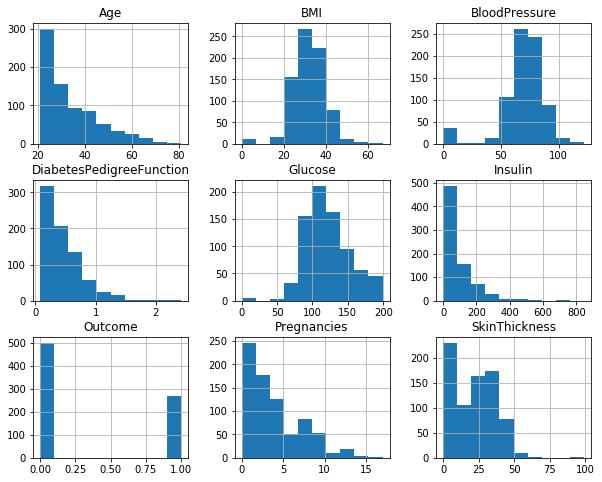

In [47]:
read_diab.hist(figsize=(10,8))
plt.figure()
plt.show()

## Details of each attribute on the Graph-

###### 1.Age- x-axis depicts the age of the patients captured in the dataset. It ranges from 21-80 years

###### 2.BMI- x-axis depicts the BMI of the patient. It ranges from ~18 to 61. BMI for few are 0 which looks to be a missing values

###### 3.Blood Pressure- x-axis depicts the BP of the patient. It captures only diastolic blood pressure in mm Hg. Ranges from 24 to 122. Few 0 values are also present.

###### 4.Diabetes Pedigree Function- It provides some data on diabetes mellitus history in relatives and the genetic relationship of those relatives to the patient.

###### 5.Glucose- Shows glucose level of each patient

###### 6.Insulin- Insulin level of the patient(2-Hour serum insulin (mu U/ml)

###### 7.Outcome- It has value either 0 or 1, captures class variable which indicates people with and without diabetes

###### 8.Pregnacies- It shows the number of time the patiens has become pregnant

###### 9.Skin Thickness- It shows skin fold thickness


In [48]:
read_diab.transpose()

,0,1,2,3,4,5,6,7,8,9,...,758,759,760,761,762,763,764,765,766,767
Pregnancies,0.000,6.000,2.000,6.000,2.000,1.000,0.000,2.000,9.000,1.0,...,2.0,2.000,2.000,0.000,0.000,0.000,3.000,0.000,4.000,0.00
Glucose,102.000,87.000,90.000,92.000,125.000,173.000,117.000,114.000,57.000,124.0,...,127.0,92.000,82.000,118.000,146.000,180.000,173.000,137.000,197.000,180.00
BloodPressure,52.000,80.000,70.000,62.000,60.000,74.000,80.000,68.000,80.000,74.0,...,58.0,76.000,52.000,64.000,82.000,66.000,82.000,40.000,70.000,78.00
SkinThickness,0.000,0.000,17.000,32.000,20.000,0.000,31.000,22.000,37.000,36.0,...,24.0,20.000,22.000,23.000,0.000,39.000,48.000,35.000,39.000,63.00
Insulin,0.000,0.000,0.000,126.000,140.000,0.000,53.000,0.000,0.000,0.0,...,275.0,0.000,115.000,89.000,0.000,0.000,465.000,168.000,744.000,14.00
BMI,25.100,23.200,27.300,32.000,33.800,36.800,45.200,28.700,32.800,27.8,...,27.7,24.200,28.500,0.000,40.500,42.000,38.400,43.100,36.700,59.40
DiabetesPedigreeFunction,0.078,0.084,0.085,0.085,0.088,0.088,0.089,0.092,0.096,0.1,...,1.6,1.698,1.699,1.731,1.781,1.893,2.137,2.288,2.329,2.42
Age,21.000,32.000,22.000,46.000,31.000,38.000,24.000,25.000,41.000,30.0,...,25.0,28.000,25.000,21.000,44.000,25.000,25.000,33.000,31.000,25.00
Outcome,0.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,0.0,...,0.0,0.000,0.000,0.000,0.000,1.000,1.000,1.000,0.000,1.00


# Pairgrid Visualization

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\contour.py:967: UserWarning: The following kwargs were not used by contour: 'label', 'color'
  s)


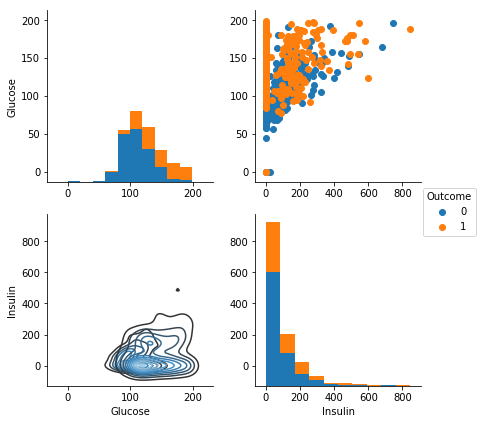

In [49]:
pg = sns.PairGrid(read_diab, vars=['Glucose', 'Insulin'], hue="Outcome", size=3.0)
pg.map_diag(plt.hist)
pg.map_upper(plt.scatter)
pg.map_lower(sns.kdeplot, cmap="Blues_d")
pg.add_legend()
plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\contour.py:967: UserWarning: The following kwargs were not used by contour: 'label', 'color'
  s)


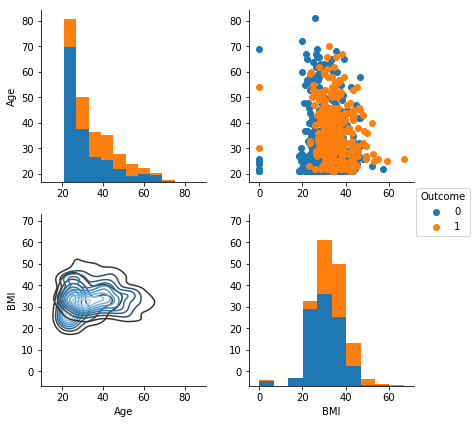

In [50]:
pg = sns.PairGrid(read_diab, vars=['Age', 'BMI'], hue="Outcome", size=3.0)
pg.map_diag(plt.hist)
pg.map_upper(plt.scatter)
pg.map_lower(sns.kdeplot, cmap="Blues_d")
pg.add_legend()
plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\contour.py:967: UserWarning: The following kwargs were not used by contour: 'label', 'color'
  s)


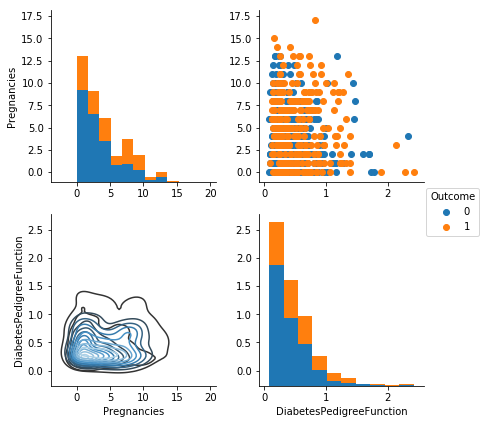

In [51]:
pg = sns.PairGrid(read_diab, vars=['Pregnancies', 'DiabetesPedigreeFunction'], hue="Outcome", size=3.0)
pg.map_diag(plt.hist)
pg.map_upper(plt.scatter)
pg.map_lower(sns.kdeplot, cmap="Blues_d")
pg.add_legend()
plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\contour.py:967: UserWarning: The following kwargs were not used by contour: 'label', 'color'
  s)


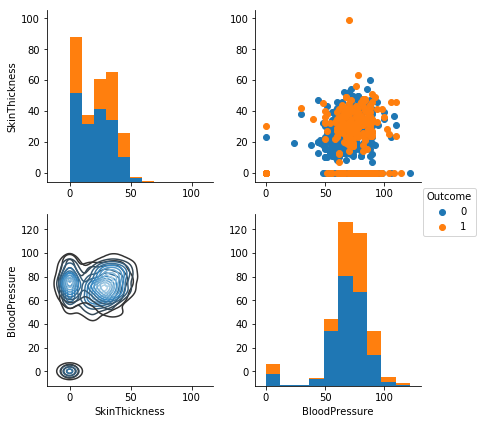

In [52]:
pg = sns.PairGrid(read_diab, vars=['SkinThickness', 'BloodPressure'], hue="Outcome", size=3.0)
pg.map_diag(plt.hist)
pg.map_upper(plt.scatter)
pg.map_lower(sns.kdeplot, cmap="Blues_d")
pg.add_legend()
plt.show()

# Heat Map Visualization

In [53]:
corr = read_diab[read_diab.columns].corr()

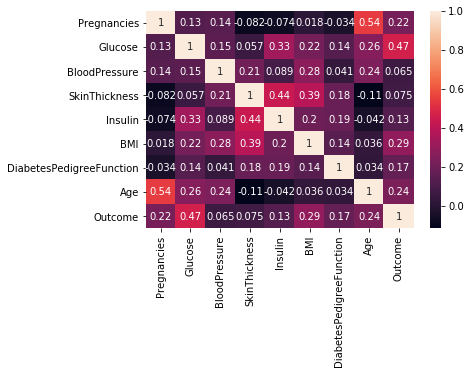

In [54]:
sns.heatmap(corr, annot = True)
plt.show()

# Violin Plot Visualization

In [55]:
columns = ['Glucose', 'Age', 'BloodPressure', 'Insulin','BMI','SkinThickness' ,'Pregnancies',  'DiabetesPedigreeFunction']
n_cols = 2
n_rows = 4
idx = 0

for i in range(n_rows):
    fg,ax = plt.subplots(nrows=1,ncols=n_cols,sharey=True,figsize=(8, 2.4))
    for j in range(n_cols):
        sns.violinplot(x = read_diab.Outcome, y=read_diab[columns[idx]], ax=ax[j])
        idx += 1
        if idx >=8 :
            break
        

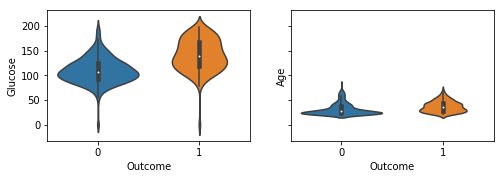

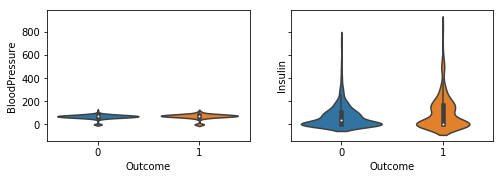

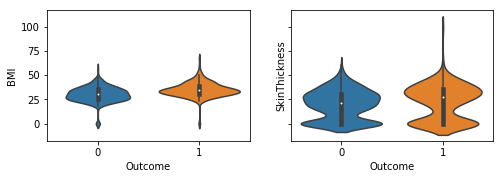

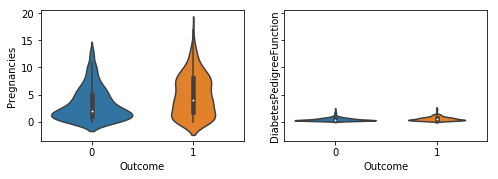

In [56]:
plt.show()

# Inference from above plots- 

###### 1.Graph shows that the glucose ranges from 44 to 200 and there isn't much difference on outcome comparison.

###### 2. But age and outcome comparison shows that the aged person are there who has '0' outcomes which helps to draw the thought that there is more chances of diabetese among young group of pima indians females.

###### 3.Insulin level shows that person having onset of diabetes has high insulin level.

###### 4.Also there seems to be an outlier in skin thickness for people having positive outcome.

###### 5.Looking onto pregnanices plot it seems like there are more pregnant Pima indian females which has onset of diabetes.

# Data Wrangling and Cleaning

In [57]:
#COUNTING THE PEOPLE WITH AND WITHOUT DIABETES- Out of 768 Pima Indian female, almost 3/4th are without diabetes
read_diab.groupby("Outcome").size()

Outcome
0    500
1    268
dtype: int64

###### As there seems to be some zero values in data, I am replacing '0' values of the columns mentioned 
below with their respective column mode.

1.BMI
2.BLOOD PRESSURE
3.GLUCOSE

###### Replace '0' BMI

In [58]:
bmi_mode=read_diab["BMI"].mode()
bmi_mode

0    32.0
dtype: float64

In [59]:
#Replacing '0' BMI- 
read_diab=read_diab.replace({'BMI': {0: 32}})

###### Replace '0' Blood Pressure

In [60]:
bp_mode=read_diab["BloodPressure"].mode()
bp_mode

0    70
dtype: int64

In [61]:
read_diab=read_diab.replace({'BloodPressure': {0: 70}}) 

###### Replace '0' Glucose

In [62]:
glu_mode=read_diab["Glucose"].mode()
glu_mode

0     99
1    100
dtype: int64

In [63]:
read_diab=read_diab.replace({'Glucose': {0: 99.5}}) 

In [64]:
read_diab.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,121.542318,72.295573,20.536458,79.799479,32.450911,0.471876,33.240885,0.348958
std,3.369578,30.488277,12.106756,15.952218,115.244002,6.875366,0.331329,11.760232,0.476951
min,0.000000,44.000000,24.000000,0.000000,0.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.375000,64.000000,0.000000,0.000000,27.500000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


# Separating the data into Train & Test (80/20 split)

In [65]:
X = read_diab.ix[:,0:8]
Y = read_diab["Outcome"]
from sklearn import model_selection
X_train, X_test, Y_train, Y_test= model_selection.train_test_split(X, Y, test_size=0.2)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  """Entry point for launching an IPython kernel.


In [66]:
len(X_train)

614

In [67]:
len(X_test)

154

In [68]:
len(Y_train)

614

In [69]:
len(Y_test)

154

In [70]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn import model_selection
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.ensemble import RandomForestClassifier

In [71]:
models = []
models.append(('LR', LogisticRegression()))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('RF', RandomForestClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC()))

In [72]:
results = []
names = []
for name,model in models:
    kfold = model_selection.KFold(n_splits=10)
    cv_result = model_selection.cross_val_score(model,X_train,Y_train, cv = kfold,scoring = "accuracy")
    kfold = model_selection.KFold(n_splits=10)
    names.append(name)
    results.append(cv_result)
for i in range(len(names)):
    print(names[i],results[i].mean())

LR 0.75097831835
LDA 0.768905341089
KNN 0.710100475939
CART 0.684214701216
RF 0.74307244844
NB 0.750951877314
SVM 0.641856160762


# Visualizing the different model accuracies using a box plot

In [73]:
ax = sns.boxplot(data=results)
ax.set_xticklabels(names)

[Text(0,0,'LR'),
 Text(0,0,'LDA'),
 Text(0,0,'KNN'),
 Text(0,0,'CART'),
 Text(0,0,'RF'),
 Text(0,0,'NB'),
 Text(0,0,'SVM')]

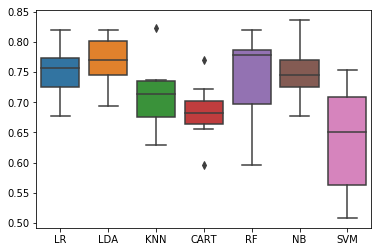

In [74]:
plt.show()

In [75]:
#FITTING THE LDA MODEL ON THE TEST DATASET
lda = LinearDiscriminantAnalysis()
lda.fit(X_train,Y_train)
predictions_lda = lda.predict(X_test)

In [76]:
from sklearn.metrics import accuracy_score 

In [77]:
print("Accuracy Score using LDA model is:")
print(accuracy_score(Y_test, predictions_lda))
print()

Accuracy Score using LDA model is:
0.772727272727



In [78]:
#FIITING LR MODEL ON THE TEST DATASET

In [79]:
lr= LogisticRegression()
lr.fit(X_train,Y_train)
predictions_lr=lr.predict(X_test)

In [80]:
print("Accuracy Score using LR Model is:")
print(accuracy_score(Y_test, predictions_lr))
print()

Accuracy Score using LR Model is:
0.746753246753



#### Random Forest Classifier

In [128]:
nest = [10,20,50,100,200]
for i in nest:    
        random_forest = RandomForestClassifier(n_estimators=i)    
        random_forest.fit(X_train, Y_train)    
        acc_random_forest = round(random_forest.score(X_train, Y_train) * 100, 2)    
        acc_test = round(random_forest.score(X_test, Y_test) * 100, 2)    
        print("n_estimators",i,acc_random_forest,acc_test)
        sns.boxplot(acc_test)


n_estimators 10 98.7 74.68
n_estimators 20 99.51 76.62
n_estimators 50 100.0 73.38
n_estimators 100 100.0 79.22
n_estimators 200 100.0 75.97


## Highest accuracy score using RF on Test data upto 79.22%

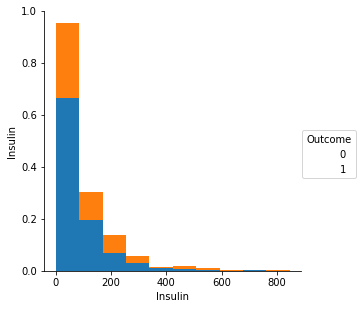

In [81]:
pg = sns.PairGrid(read_diab, vars=['Insulin'], hue="Outcome", size=4.4)
pg.map_diag(plt.hist)
pg.add_legend()
plt.show()

In [82]:
pg.map_upper(plt.scatter)

pg.map_lower(sns.kdeplot, cmap="Blues_d")